In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
#https://www.census.gov/data/datasets/time-series/demo/sahie/estimates-acs.html

In [3]:

data = pd.read_csv('sahie_2022.csv', low_memory=False)
data['state_name'] = data['state_name'].str.strip() # remove the spaces 
data['county_name'] = data['county_name'].str.strip()# remove the spaces 
texas_data = data[data['state_name'] == 'Texas'].copy() #only Texas data
texas_data.drop(columns='Unnamed: 25', inplace=True) #remove blank column on right 
texas_data.dropna(axis=0, inplace=True) #remove rows with Na values 
texas_data.reset_index(drop=True, inplace=True) #reset index 
texas_data.rename(columns={'iprcat':'Income Category', 'PCTELIG':'Percent Uninsured for all income levels', 
                           'NUI':'Number Uninsured',
                           'NIC': 'Number Insured', 'nui_moe': 'Number Uninsured MOE', 
                           'nic_moe':'Number Insured MOE',
                           'pctelig_moe':'Percent Uninsured for all income levels MOE', 
                           'PCTLIIC':'Percent Insured for all income levels',
                           'pctliic_moe':'Percent Insured for all income levels MOE'}, inplace=True) #rename columns
#make sure columns that have numbers are the right type, and not 'object'
cols = texas_data.loc[:, 'statefips':'Percent Insured for all income levels MOE'].columns
texas_data[cols] = texas_data[cols].apply(pd.to_numeric, errors='coerce')

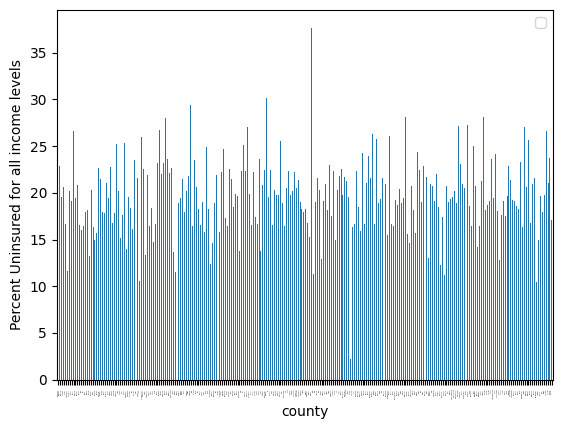

The highest percentage is 37.7% and the lowest is 2.2%
The county with the highest percentage is Kenedy and the lowest is Loving


In [4]:
newdata = texas_data[texas_data['county_name'] != ''].copy() #remove rows with a blank county name 
newdata = newdata[
    (newdata['agecat'] == 0) &
    (newdata['racecat'] == 0) &
    (newdata['sexcat'] == 0) &
    (newdata['Income Category'] == 0)
].copy()
newdata['county_name'] = newdata['county_name'].str.replace(r'\s*county\s*','',case=False, regex=True) #remove 'county' 
newdata.rename(columns={'county_name':'county'}, inplace=True) #rename column 
#make sure column is the right type 
newdata['Percent Uninsured for all income levels'] = newdata['Percent Uninsured for all income levels'].astype(dtype='float64')
newdata.set_index('county', drop=True, inplace=True) #make 'county' the index 

#create bar graph
newdata.plot(kind='bar', y='Percent Uninsured for all income levels')
plt.xticks(fontsize=1)
plt.legend(labels = '')
plt.ylabel('Percent Uninsured for all income levels')
plt.show()

#identify the counties with highest and lowest percentages of uninsured individuals 
highest = newdata['Percent Uninsured for all income levels'].max()
lowest = newdata['Percent Uninsured for all income levels'].min()
county_highest = newdata['Percent Uninsured for all income levels'].idxmax()
county_lowest = newdata['Percent Uninsured for all income levels'].idxmin()

this = (
    f'The highest percentage is {round(highest,2)}% and the lowest is {round(lowest, 3)}%\n'
    f'The county with the highest percentage is {county_highest} and the lowest is {county_lowest}'
)
print(this)

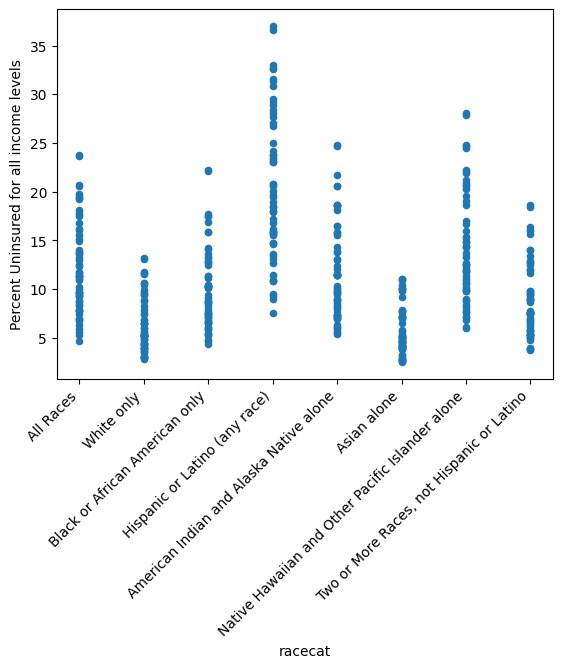

In [5]:
race_data = texas_data[texas_data['county_name'] == ''].copy()
hmap = {0:'All Races', 1:'White only', 2:'Black or African American only', 3:'Hispanic or Latino (any race)',
        4:'American Indian and Alaska Native alone', 5:'Asian alone', 6:'Native Hawaiian and Other Pacific Islander alone',
        7:'Two or More Races, not Hispanic or Latino'}

race_data['racecat'] = race_data['racecat'].map(hmap)
race_data = race_data[(race_data['sexcat'] == 1) | (race_data['sexcat'] == 2)]
race_data.plot(x='racecat', y='Percent Uninsured for all income levels', kind='scatter')
plt.xticks(rotation = 45, ha = 'right')
plt.title('')
plt.show()

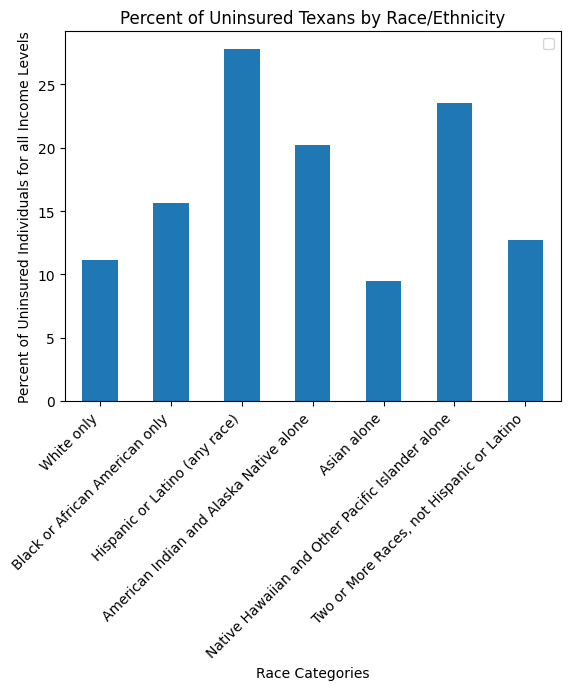

In [6]:
new_race_data = texas_data[texas_data['county_name'] == ''].copy()
hmap = {0:'All Races', 1:'White only', 2:'Black or African American only', 3:'Hispanic or Latino (any race)',
        4:'American Indian and Alaska Native alone', 5:'Asian alone', 6:'Native Hawaiian and Other Pacific Islander alone',
        7:'Two or More Races, not Hispanic or Latino'}

new_race_data['racecat'] = new_race_data['racecat'].map(hmap)
new_race_data.rename(columns={'PCTUI':'Percent uninsured in demographic group for income category'}, inplace=True)
new_race_data = new_race_data[(new_race_data['Income Category'] == 0) & (new_race_data['sexcat'] == 0) & (new_race_data['agecat'] == 0)].copy()
new_race_data
new_race_data.reset_index(inplace=True, drop=True)
new_race_data.set_index('racecat', inplace=True)
new_race_data
new_race_data.drop(index='All Races', inplace=True)
new_race_data.plot(kind='bar', y='Percent Uninsured for all income levels')
plt.xticks(rotation=45, ha='right')
plt.legend(labels='')
plt.xlabel('Race Categories')
plt.ylabel('Percent of Uninsured Individuals for all Income Levels')
plt.title('Percent of Uninsured Texans by Race/Ethnicity')
plt.show()


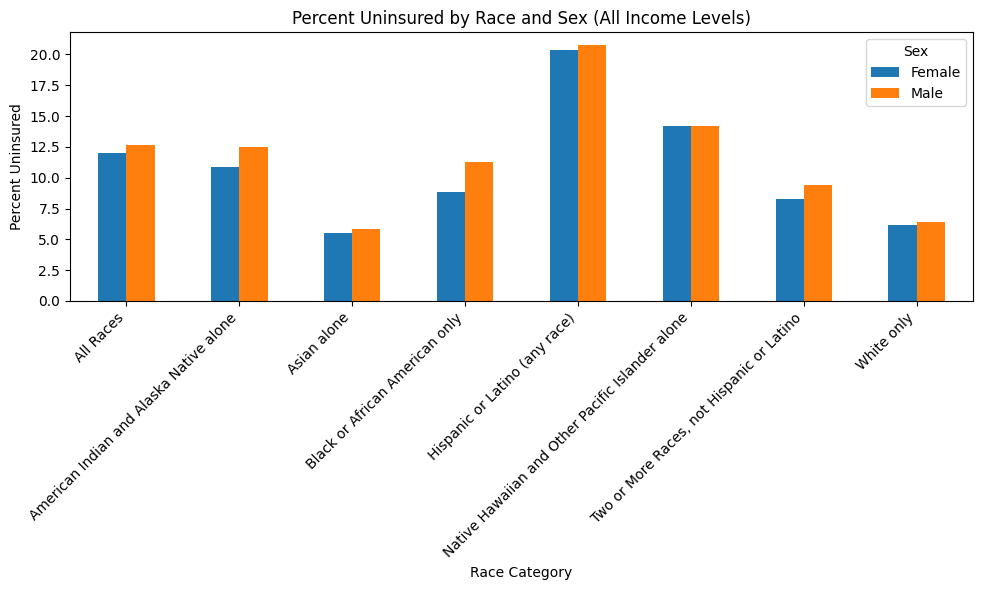

In [7]:
race_sex_data = texas_data[texas_data['county_name'] == ''].copy()

# Map race categories to names
race_map = {
    0: 'All Races', 1: 'White only', 2: 'Black or African American only',
    3: 'Hispanic or Latino (any race)', 4: 'American Indian and Alaska Native alone',
    5: 'Asian alone', 6: 'Native Hawaiian and Other Pacific Islander alone',
    7: 'Two or More Races, not Hispanic or Latino'
}

# Map sex categories to labels
sex_map = {
    1: 'Male',
    2: 'Female'
}

# Apply the mappings
race_sex_data['racecat'] = race_sex_data['racecat'].map(race_map)
race_sex_data['sexcat'] = race_sex_data['sexcat'].map(sex_map)

# Drop missing values in key columns
plot_data = race_sex_data.dropna(subset=['racecat', 'sexcat', 'Percent Uninsured for all income levels'])

# Create a pivot table for grouped bar chart
pivot_data = plot_data.pivot_table(index='racecat', columns='sexcat', values='Percent Uninsured for all income levels')

# Plot
pivot_data.plot(kind='bar', figsize=(10, 6))
plt.xticks(rotation=45, ha='right')
plt.title('Percent Uninsured by Race and Sex (All Income Levels)')
plt.ylabel('Percent Uninsured')
plt.xlabel('Race Category')
plt.legend(title='Sex')
plt.tight_layout()
plt.show()


In [8]:
texas_data = texas_data[texas_data['county_name'] != '']
unins_by_county_data = texas_data.groupby('county_name').mean('Percent Uninsured for all income levels')
unins_by_county_data= unins_by_county_data[['Percent Uninsured for all income levels']]
unins_by_county_data.reset_index(inplace=True)

unins_by_county_data

,county_name,Percent Uninsured for all income levels
0,Anderson County,11.884375
1,Andrews County,13.580208
2,Angelina County,13.498958
3,Aransas County,12.014583
4,Archer County,9.450000
...,...,...
249,Wood County,12.112500
250,Yoakum County,16.661458
251,Young County,12.984375
252,Zapata County,19.082292


Creating a graph that shows counties with high or low % minorities along with percent uninsured 

In [9]:
demographics = pd.read_csv('/Users/antoantony/Library/CloudStorage/OneDrive-TheUniversityofTexasatAustin/Python/VS_Code/Data Analysis/Disparities Dashboard/demographics.csv')
final = pd.merge(unins_by_county_data, demographics, left_on='county_name', right_on='COUNTYNAME',
                 how='left')
final.drop(columns='Unnamed: 0', inplace=True)

def label(input):
    if pd.isna(input):
        return 'Low % Minority'
    else:
        return 'High % Minority'
    
final['% Minority'] = final['COUNTYNAME'].apply(label)
final

,county_name,Percent Uninsured for all income levels,COUNTYNAME,% Minority
0,Anderson County,11.884375,Anderson County,High % Minority
1,Andrews County,13.580208,NaN,Low % Minority
2,Angelina County,13.498958,Angelina County,High % Minority
3,Aransas County,12.014583,NaN,Low % Minority
4,Archer County,9.450000,NaN,Low % Minority
...,...,...,...,...
249,Wood County,12.112500,NaN,Low % Minority
250,Yoakum County,16.661458,Yoakum County,High % Minority
251,Young County,12.984375,NaN,Low % Minority
252,Zapata County,19.082292,NaN,Low % Minority


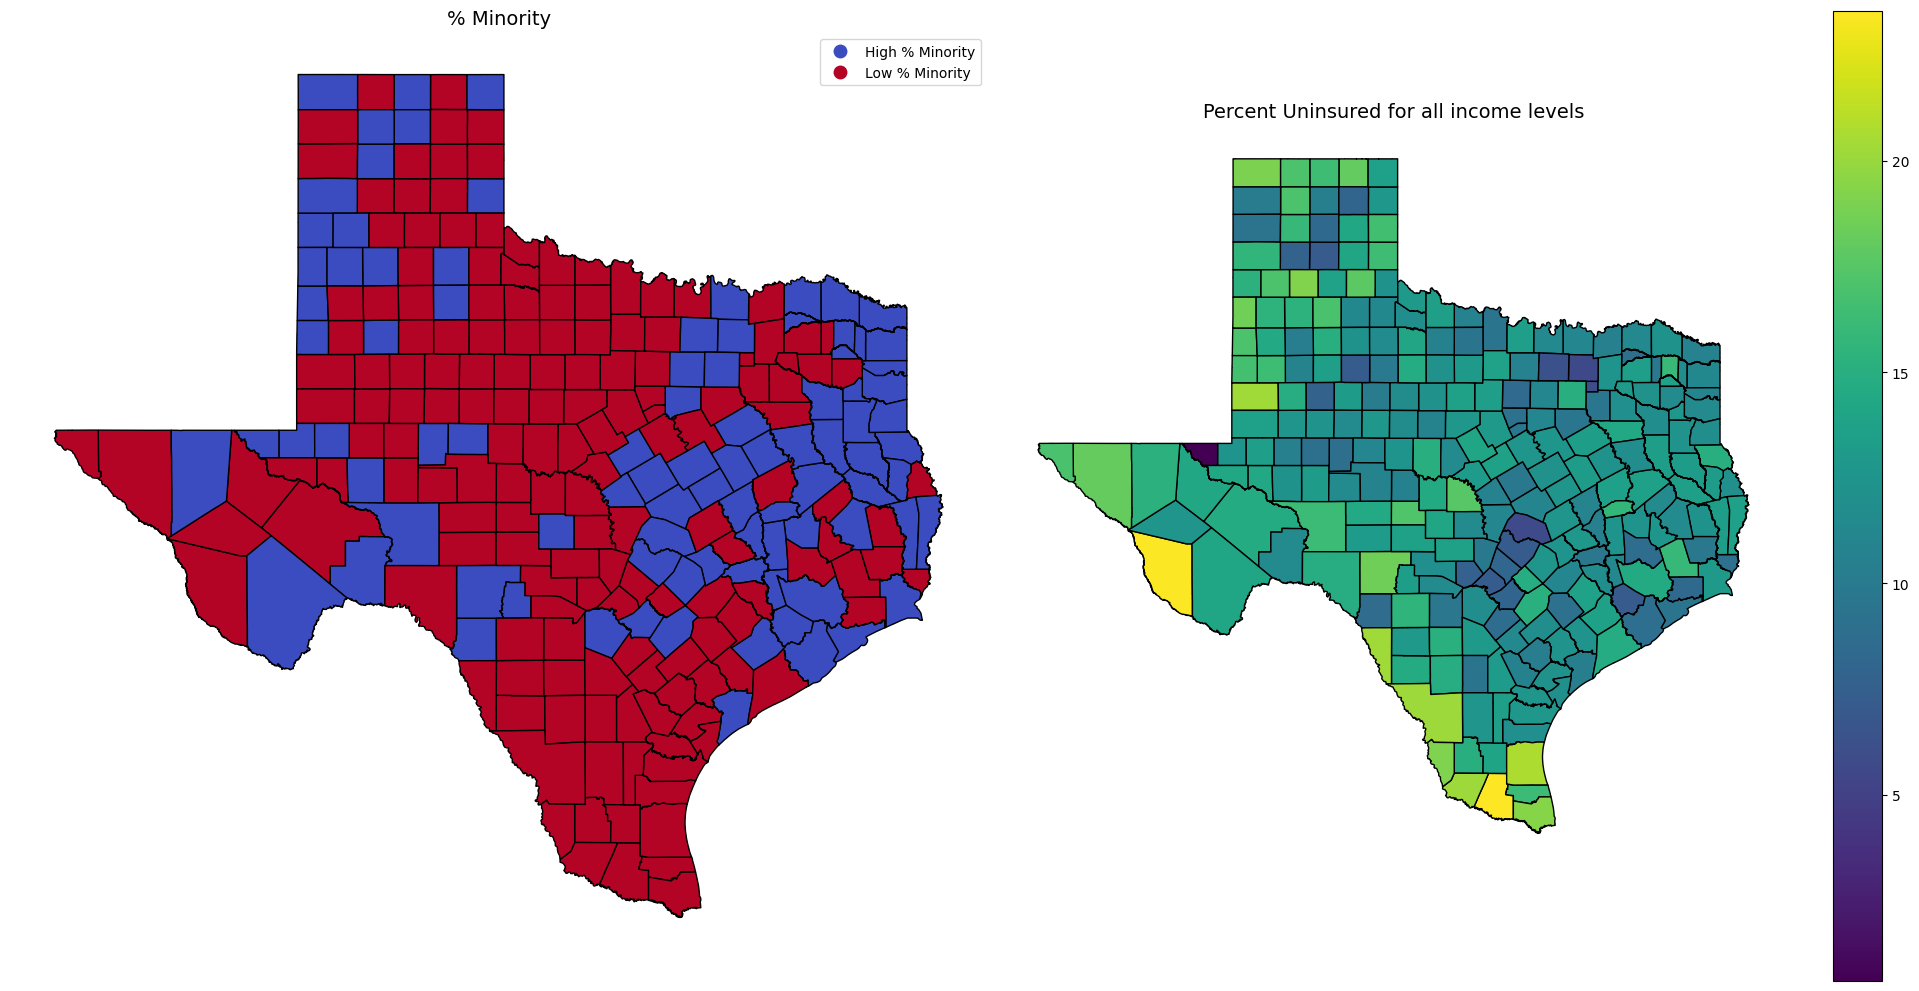

In [12]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load shapefile and filter for Texas
tx_counties = gpd.read_file('/Users/antoantony/Library/CloudStorage/OneDrive-TheUniversityofTexasatAustin/Python/VS_Code/Data Analysis/Disparities Dashboard/texas_shapefile')
tx_counties = tx_counties[tx_counties['STATEFP'] == '48']

final['county_name'] = final['county_name'].str.replace(r'\s*county\s*','',case=False, regex=True) #remove 'county'
final['COUNTYNAME'] = final['COUNTYNAME'].str.strip()
final['county_name'] = final['county_name'].str.strip()

tx_map = tx_counties.merge(final,left_on='NAME', right_on='county_name')
# Percent Uninsured for all income levels
# % Minority
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
tx_map.plot(column='% Minority', ax=axs[0], legend=True, cmap='coolwarm', edgecolor='black')
axs[0].set_title('% Minority', fontsize=14)
axs[0].axis('off')
tx_map.plot(column='Percent Uninsured for all income levels', ax=axs[1], legend=True, cmap='viridis', edgecolor='black')
axs[1].set_title('Percent Uninsured for all income levels', fontsize=14)
axs[1].axis('off')
plt.tight_layout()
plt.show()

In [15]:
final.groupby('% Minority').mean('Percent Uninsured for all income levels')

,Percent Uninsured for all income levels
% Minority,
High % Minority,12.457201
Low % Minority,12.802778
